# Parallelizing Neural Network Training with PyTorch


Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).


In [1]:
from IPython.display import Image as IPythonImage

## PyTorch and training performance


### What is PyTorch?


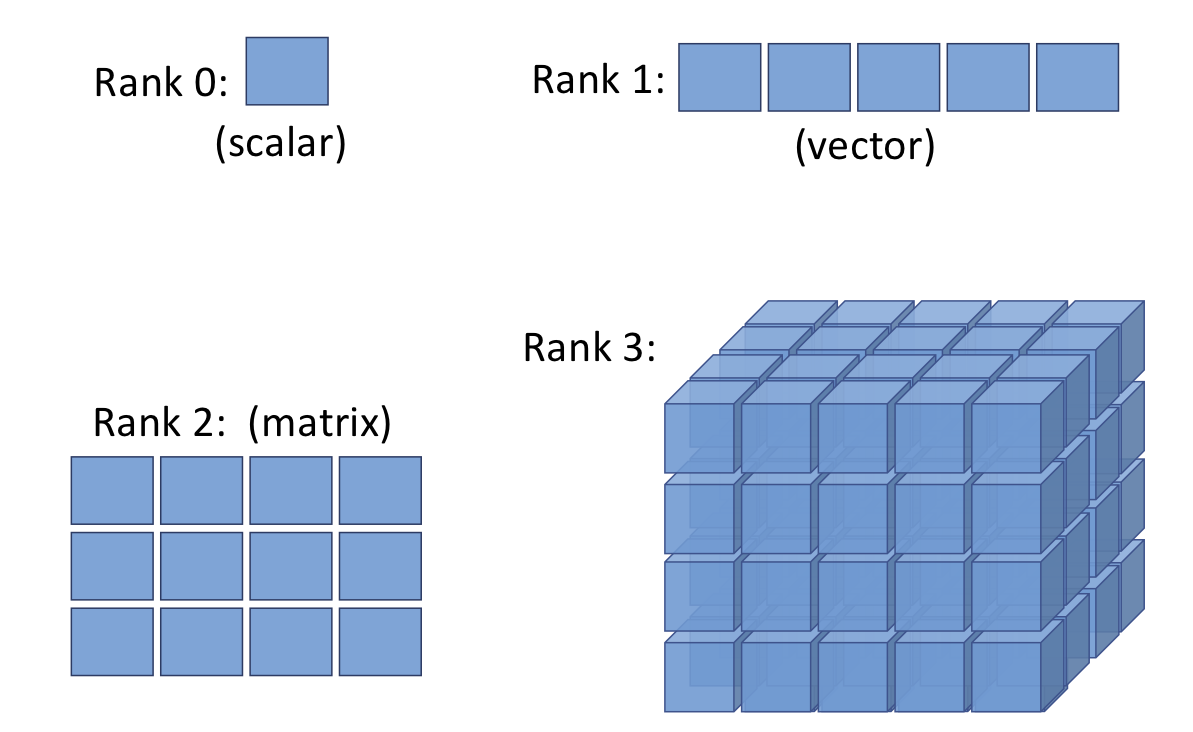

In [2]:
IPythonImage(filename='figures/1-01.png', width=500)

### How we will learn PyTorch


## First steps with PyTorch


### Installing PyTorch


In [3]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)

np.set_printoptions(precision=3)

PyTorch version: 1.11.0


### Creating tensors in PyTorch


In [4]:
t_a = torch.tensor([1, 2, 3])
t_b = torch.from_numpy(np.array([4, 5, 6], dtype=np.int32))

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [5]:
torch.is_tensor(t_a)

True

In [6]:
t_ones = torch.ones(2, 3)

t_ones.shape

torch.Size([2, 3])

In [7]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [8]:
rand_tensor = torch.rand(2, 3)

print(rand_tensor)

tensor([[0.9427, 0.3611, 0.8981],
        [0.6849, 0.9567, 0.7224]])


### Manipulating the data type and shape of a tensor


In [9]:
t_a_new = t_a.to(torch.int64)

print(t_a_new.dtype)

torch.int64


In [10]:
t = torch.rand(3, 5)

t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [11]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)

print(t_reshape.shape)

torch.Size([5, 6])


In [12]:
t = torch.zeros(1, 2, 1, 4, 1)

t_sqz = torch.squeeze(t, 2)

print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


In [13]:
t

tensor([[[[[0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.]]]]])

### Applying mathematical operations to tensors


In [14]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [15]:
t1

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])

In [16]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [17]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [18]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))

print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [19]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)

print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [20]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)

print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [21]:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.678, 0.508, 1.116, 0.549, 0.185], dtype=float32)

### Split, stack, and concatenate tensors


In [22]:
torch.manual_seed(1)

t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, 3)

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [23]:
torch.manual_seed(1)
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [24]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [25]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## Building input pipelines in PyTorch


### Creating a PyTorch DataLoader from existing tensors


In [26]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [27]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [28]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Combining two tensors into a joint dataset


In [29]:
from torch.utils.data import TensorDataset

In [30]:
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print(f'x: {example[0]}, y: {example[1]}')

x: tensor([0.7576, 0.2793, 0.4031]), y: 0
x: tensor([0.7347, 0.0293, 0.7999]), y: 1
x: tensor([0.3971, 0.7544, 0.5695]), y: 2
x: tensor([0.4388, 0.6387, 0.5247]), y: 3


### Shuffle, batch, and repeat


In [31]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])

for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}: x: {batch[0]}\n y: {batch[1]}')

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]])
 y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]])
 y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]])
 y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]])
 y: tensor([0, 1])


### Creating a dataset from files on your local storage disk


In [32]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


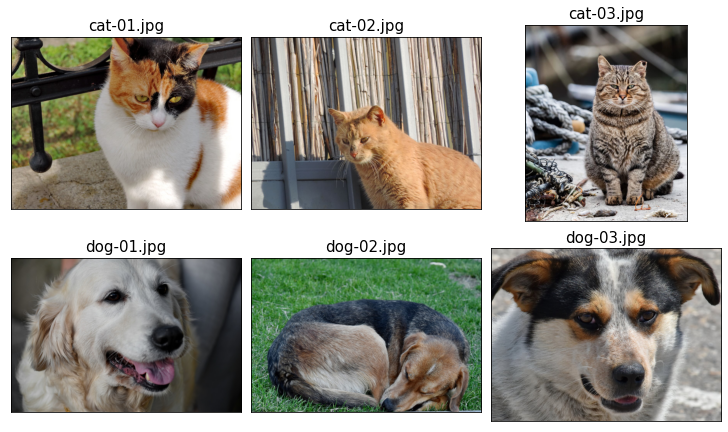

In [33]:
import matplotlib.pyplot as plt
import os
from PIL import Image

_, axes = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)

for file, ax in zip(file_list, axes.flatten()):
    img = Image.open(file)
    print(f'Image shape: {np.array(img).shape}')
    ax.set(xticks=[], yticks=[])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

# plt.savefig('figures/1-02.png')
plt.show()

In [34]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [35]:
from torch.utils.data import Dataset

In [36]:
class ImageDataset(Dataset):

    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)


image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


In [37]:
import torchvision.transforms as transforms


class ImageDataset(Dataset):

    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label

    def __len__(self):
        return len(self.labels)


img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

image_dataset = ImageDataset(file_list, labels, transform)

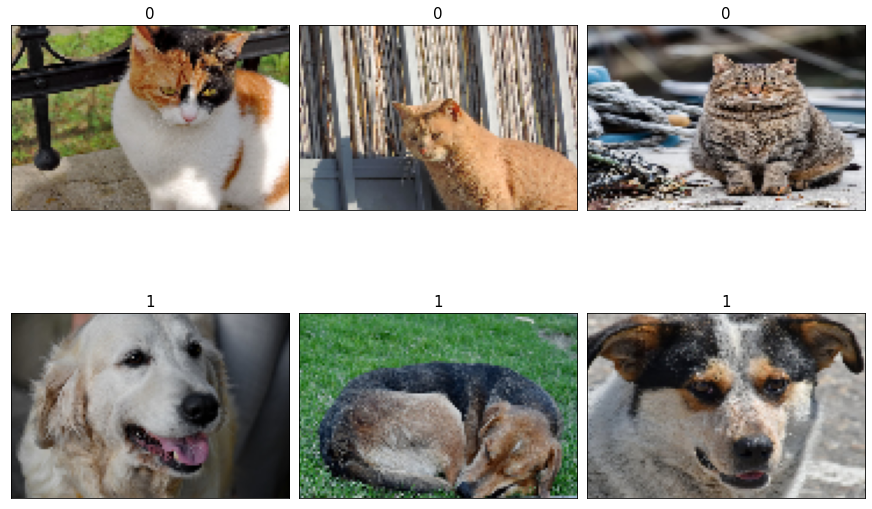

In [38]:
_, axes = plt.subplots(2, 3, figsize=(12, 8), constrained_layout=True)

for example, ax in zip(image_dataset, axes.flatten()):
    ax.set(xticks=[], yticks=[])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

# plt.savefig('figures/1-03.png')
plt.show()

### Fetching available datasets from the torchvision.datasets library


In [39]:
from torchvision import datasets

In [40]:
image_path = '../../datasets/torch'
celeba_dataset = datasets.CelebA(image_path,
                                 split='train',
                                 target_type='attr',
                                 download=True)

assert isinstance(celeba_dataset, torch.utils.data.Dataset)

Files already downloaded and verified


In [41]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x12079F520>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


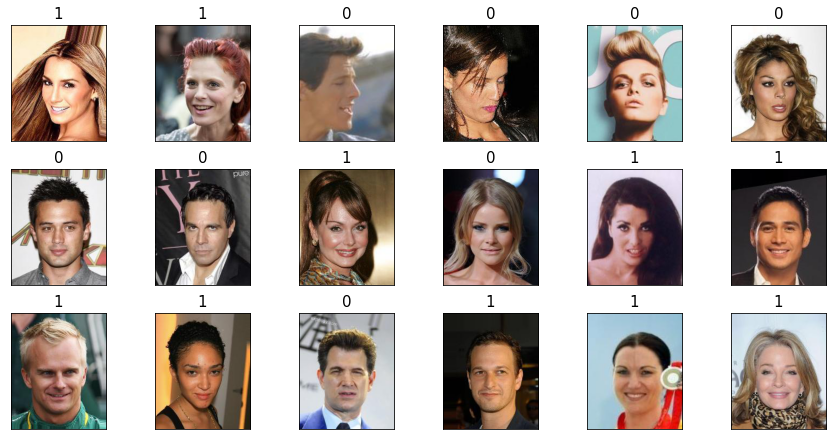

In [42]:
from itertools import islice

_, axes = plt.subplots(3, 6, figsize=(12, 6), constrained_layout=True)

for (image, attributes), ax in islice(zip(celeba_dataset, axes.flatten()), 18):
    ax.set(xticks=[], yticks=[])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)

# plt.savefig('figures/1-04.png')
plt.show()

(<PIL.Image.Image image mode=L size=28x28 at 0x14CEF8460>, 5)


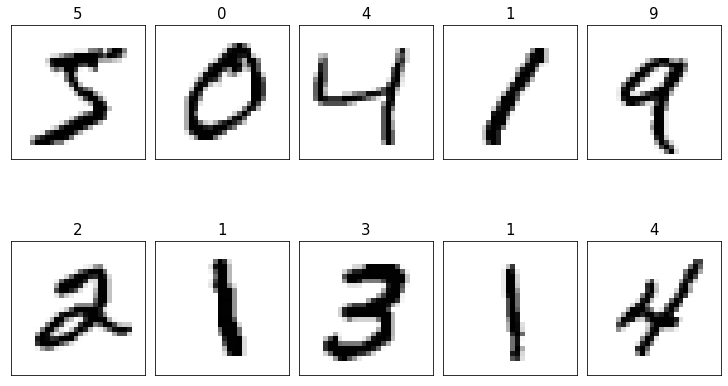

In [43]:
mnist_dataset = datasets.MNIST(image_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

_, axes = plt.subplots(2, 5, figsize=(10, 6), constrained_layout=True)
for (image, label), ax in islice(zip(mnist_dataset, axes.flatten()), 10):
    ax.set(xticks=[], yticks=[])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

# plt.savefig('figures/1-05.png')
plt.show()

## Building a neural network model in PyTorch


### The PyTorch neural network module (torch.nn)


### Building a linear regression model


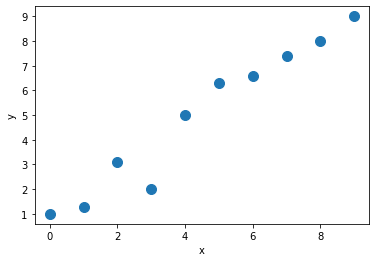

In [44]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0],
                   dtype='float32')

_, ax = plt.subplots(figsize=(6, 4))

ax.plot(X_train, y_train, 'o', markersize=10)
ax.set(xlabel='x', ylabel='y')

# plt.savefig('figures/1-06.png')
plt.show()

In [45]:
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [46]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)


def loss_fn(input, target):
    return (input - target).pow(2).mean()


def model(xb):
    return xb @ weight + bias


learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()

    if epoch % log_epochs == 0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')


Epoch 0  Loss 45.0782
Epoch 10  Loss 26.4366
Epoch 20  Loss 1.5918
Epoch 30  Loss 14.1307
Epoch 40  Loss 11.6038
Epoch 50  Loss 6.3084
Epoch 60  Loss 0.6349
Epoch 70  Loss 3.1374
Epoch 80  Loss 1.9999
Epoch 90  Loss 0.3133
Epoch 100  Loss 0.7653
Epoch 110  Loss 1.0039
Epoch 120  Loss 0.0235
Epoch 130  Loss 0.5176
Epoch 140  Loss 0.0759
Epoch 150  Loss 1.8789
Epoch 160  Loss 0.0008
Epoch 170  Loss 0.0866
Epoch 180  Loss 0.0646
Epoch 190  Loss 0.0011


Final Parameters: 2.6696107387542725, 4.879678249359131


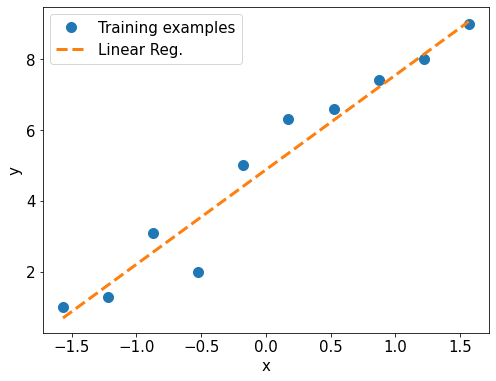

In [47]:
print(f'Final Parameters: {weight.item()}, {bias.item()}')

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()

_, ax = plt.subplots(figsize=(8, 6))

ax.plot(X_train_norm, y_train, 'o', markersize=10)
ax.plot(X_test_norm, y_pred, '--', lw=3)
ax.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# plt.savefig('figures/1-07.png')
plt.show()

### Model training via the torch.nn and torch.optim modules


In [48]:
import torch.nn as nn

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

loss_fn = nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:, 0]

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()

    if epoch % log_epochs == 0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 24.6684
Epoch 10  Loss 29.1377
Epoch 20  Loss 20.9207
Epoch 30  Loss 0.1257
Epoch 40  Loss 12.4922
Epoch 50  Loss 1.7845
Epoch 60  Loss 7.6425
Epoch 70  Loss 2.5606
Epoch 80  Loss 0.0157
Epoch 90  Loss 0.7548
Epoch 100  Loss 0.8412
Epoch 110  Loss 0.4923
Epoch 120  Loss 0.0823
Epoch 130  Loss 0.0794
Epoch 140  Loss 0.0891
Epoch 150  Loss 0.0973
Epoch 160  Loss 0.1043
Epoch 170  Loss 0.1103
Epoch 180  Loss 0.0009
Epoch 190  Loss 0.0764


Final Parameters: 2.6496422290802 4.87706995010376


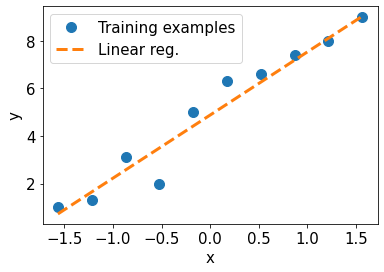

In [49]:
print('Final Parameters:', model.weight.item(), model.bias.item())

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()

_, ax = plt.subplots(figsize=(6, 4))

ax.plot(X_train_norm, y_train, 'o', markersize=10)
ax.plot(X_test_norm, y_pred, '--', lw=3)
ax.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# plt.savefig('figures/1-08.png')
plt.show()

## Building a multilayer perceptron for classifying flowers in the Iris dataset


In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=1. / 3,
                                                    random_state=1)

In [51]:
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [52]:
class Model(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x


input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [53]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()

    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

/var/folders/py/n14256yd5r5ddms88x9bvsv40000gn/T/ipykernel_68726/3275897278.py:12: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


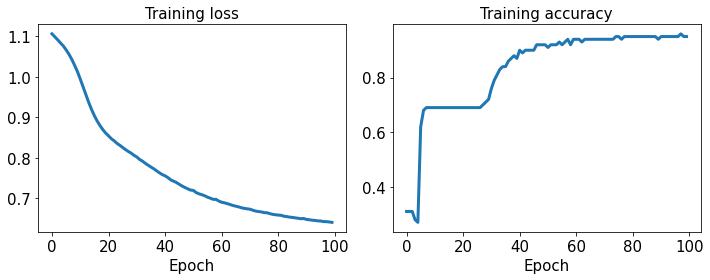

In [54]:
_, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

axes[0].plot(loss_hist, lw=3)
axes[0].set_title('Training loss', size=15)
axes[0].set_xlabel('Epoch', size=15)
axes[0].tick_params(axis='both', which='major', labelsize=15)

axes[1].plot(accuracy_hist, lw=3)
axes[1].set_title('Training accuracy', size=15)
axes[1].set_xlabel('Epoch', size=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

# plt.savefig('figures/1-09.png')
plt.show()

### Evaluating the trained model on the test dataset


In [55]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


### Saving and reloading the trained model


In [56]:
path = '../../datasets/torch/iris_classifier.pt'
torch.save(model, path)

In [57]:
model_new = torch.load(path)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [58]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [59]:
path = '../../datasets/torch/iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [60]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>

## Choosing activation functions for multilayer neural networks


### Logistic function recap


In [61]:
import numpy as np

X = np.array([1, 1.4, 2.5])  ## first value must be 1
w = np.array([0.4, 0.3, 0.5])


def net_input(X, w):
    return np.dot(X, w)


def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))


def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)


print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


In [62]:
# W : array with shape = (n_output_units, n_hidden_units+1)
# note that the first column are the bias units

W = np.array([[1.1, 1.2, 0.8, 0.4], [0.2, 0.4, 1.0, 0.2], [0.6, 1.5, 1.2,
                                                           0.7]])

# A : data array with shape = (n_hidden_units + 1, n_samples)
# note that the first column of this array must be 1

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)

print(f'Net Input: \n{Z}')
print(f'Output Units:\n{y_probas}')

Net Input: 
[1.78 0.76 1.65]
Output Units:
[0.856 0.681 0.839]


In [63]:
y_class = np.argmax(Z, axis=0)
print(f'Predicted class label: {y_class}')

Predicted class label: 0


### Estimating class probabilities in multiclass classification via the softmax function


In [64]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))


y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

np.sum(y_probas)

Probabilities:
 [0.447 0.161 0.392]


1.0

In [65]:
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

### Broadening the output spectrum using a hyperbolic tangent


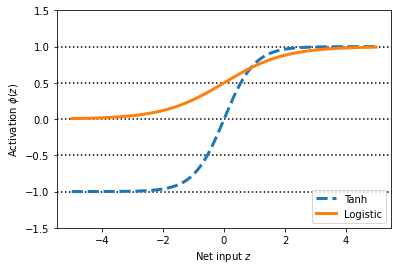

In [66]:
import matplotlib.pyplot as plt


def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)


z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)

_, ax = plt.subplots(figsize=(6, 4))

ax.set(ylim=[-1.5, 1.5], xlabel='Net input $z$', ylabel='Activation $\phi(z)$')
ax.axhline(1, color='black', linestyle=':')
ax.axhline(0.5, color='black', linestyle=':')
ax.axhline(0, color='black', linestyle=':')
ax.axhline(-0.5, color='black', linestyle=':')
ax.axhline(-1, color='black', linestyle=':')
ax.plot(z, tanh_act, linewidth=3, linestyle='--', label='Tanh')
plt.plot(z, log_act, linewidth=3, label='Logistic')
plt.legend(loc='lower right')

# plt.savefig('figures/1-10.png')
plt.show()

In [67]:
np.tanh(z)

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [68]:
torch.tanh(torch.from_numpy(z))


tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In [69]:
from scipy.special import expit

expit(z)

array([0.007, 0.007, 0.007, ..., 0.993, 0.993, 0.993])

In [70]:
torch.sigmoid(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

### Rectified linear unit activation


In [71]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)

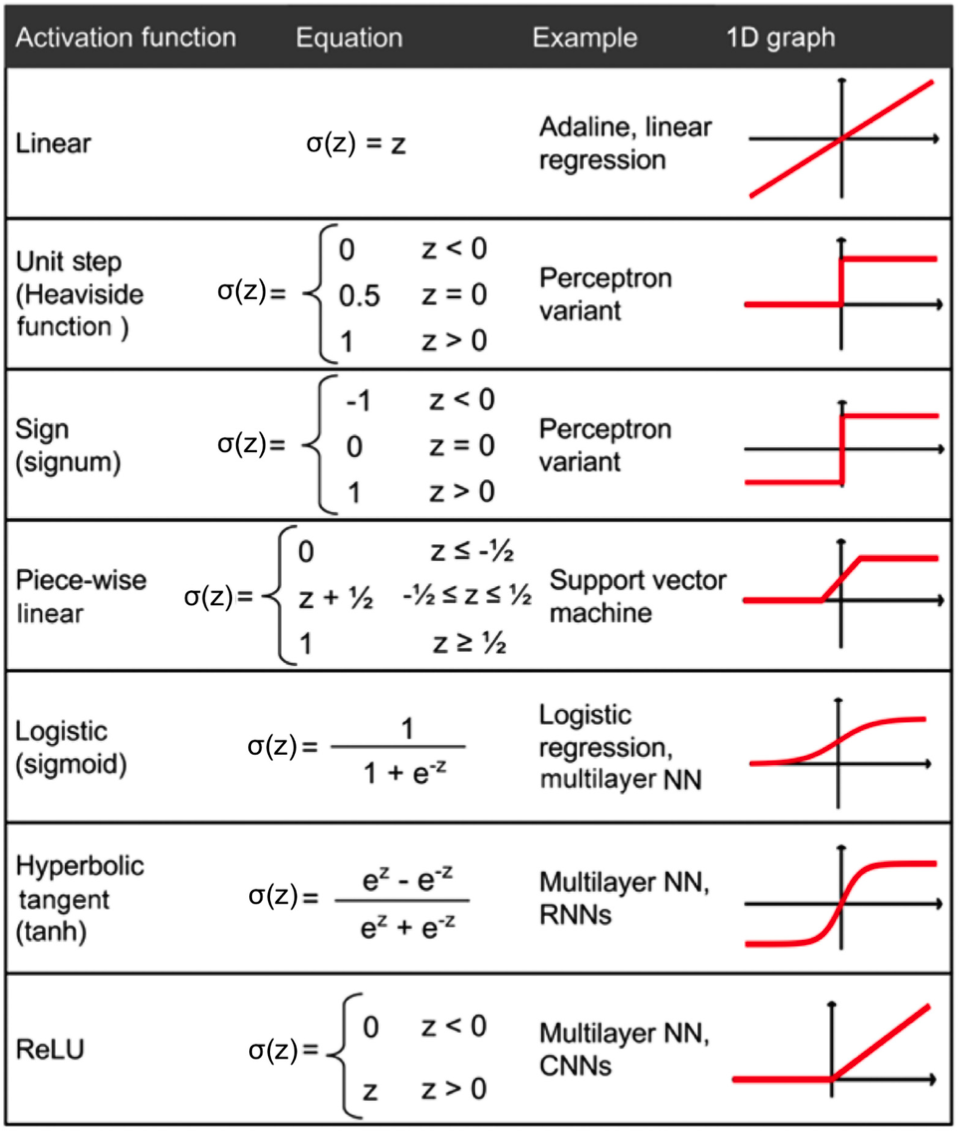

In [72]:
IPythonImage(filename='figures/1-11.png', width=500)